ah yes.... the infamous iris species project thingy

# EDA! E! D! A!

In [20]:
# how do I load a dataset? LOL 

# maybe let's start with actually looking at the csv file lines... 

import torch
import pandas as pd

csv_path = 'Iris.csv'
df = pd.read_csv(csv_path)

let's take a look at the data set - shape property shows # lines, rows

In [21]:
# let's take a look at the data set
print(df.head(10))
print(df.shape) # (150 lines, 6 rows) - oh that's cool, shape property.

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
(150, 6)


In [34]:
# just learned about DESCRIBE WOW 

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


want to find:
- species categories, 
- the average, min/max, of sepal and petal

unique number of species:

In [22]:
# want to find:
#   species categories, 
#   the average, min/max, of sepal and petal

# unique number of species -- 
print(df['Species'].unique())
print(df['Species'].nunique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


In [23]:
# want to see: 
# iris-setosa: average, min/max, 
# etc. 

# groupby omg, i forgot about groupby. 

print(df.groupby('Species')['SepalLengthCm'].mean())

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64


In [24]:
print(df.groupby('Species').mean())

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


In [25]:
print(df.groupby('Species').max())

                  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                       
Iris-setosa       50            5.8           4.4            1.9           0.6
Iris-versicolor  100            7.0           3.4            5.1           1.8
Iris-virginica   150            7.9           3.8            6.9           2.5


In [26]:
print(df.groupby('Species').min())

                  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                       
Iris-setosa        1            4.3           2.3            1.0           0.1
Iris-versicolor   51            4.9           2.0            3.0           1.0
Iris-virginica   101            4.9           2.2            4.5           1.4


In [27]:
print(df.groupby('Species').count())

                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                      
Iris-setosa      50             50            50             50            50
Iris-versicolor  50             50            50             50            50
Iris-virginica   50             50            50             50            50


In [35]:
df.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

Let's look at Sepal data

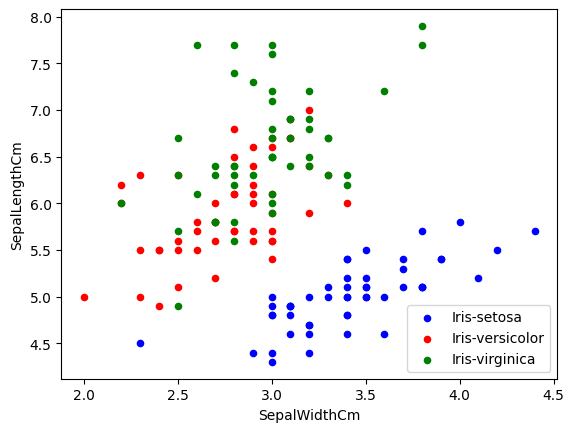

In [28]:
# now i want to plot each of the data on a chart, with different colours. 

ax = df[df['Species'] == 'Iris-setosa'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Blue', label='Iris-setosa')
bx = df[df['Species'] == 'Iris-versicolor'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Red', label='Iris-versicolor', ax=ax)
cx = df[df['Species'] == 'Iris-virginica'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Green', label='Iris-virginica', ax=bx)

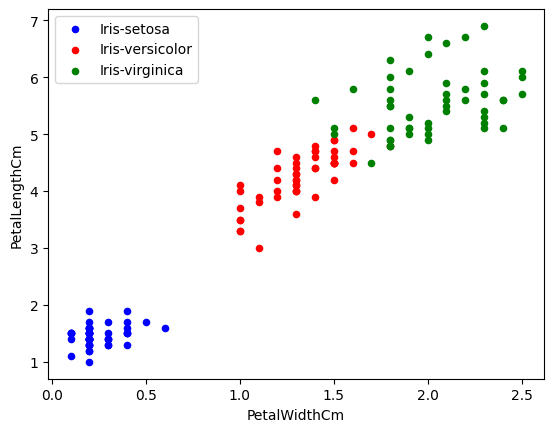

In [29]:
# now i want to plot each of the data on a chart, with different colours. 

ax = df[df['Species'] == 'Iris-setosa'].plot.scatter(x='PetalWidthCm', y='PetalLengthCm', color='Blue', label='Iris-setosa')
bx = df[df['Species'] == 'Iris-versicolor'].plot.scatter(x='PetalWidthCm', y='PetalLengthCm', color='Red', label='Iris-versicolor', ax=ax)
cx = df[df['Species'] == 'Iris-virginica'].plot.scatter(x='PetalWidthCm', y='PetalLengthCm', color='Green', label='Iris-virginica', ax=bx)

# training?!

can we put a model that predicts what flower it is based on all 4 attributes? 
visually, we can see lol, that there's some pattern.

- need to train on 90% of the data, test on 10% 
- also, need to sample randomly. 
- so this is: supervised learning (since we know what's the "outputs")

what do I pick? 
- classification vs. regression
- here i am looking to CLASSIFY (into one of 3 categories, discrete)
- whereas otherwise if it's a numerical / continuous number, that would be REGRESSION. 

so within classification I could pick: 
- logistic regression, support vector machines (SVM), decision trees, random forests, naive bayes 

and then we can measure the "best method" using....? well, not exactly loss is it?:
- binary cross-entropy loss / log loss 
- categorical cross-entropy loss
- hinge loss 
- log loss

In [32]:
# let's sample randomly for 90% of training and test data 

# can use dataframe's sample() and then drop those: 
# 
# train_set = df.sample(frac=0.8, random_state=42)
# test_set = df.drop(train_set.index)

# BUT best to use sklearn method.... 
# pip install scikit-learn tho, but the shortened is sklearn. 

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, random_state=42, test_size=0.2)
# random_state is shuffling, popular random seeds is 0, 42 (haha, answer to universe)
print(train_set.shape)
print(test_set.shape)


(120, 6)
(30, 6)
